<a href="https://colab.research.google.com/github/nikhilraju0904/My-projects/blob/main/flight_ticket_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Python Libraries And Packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

# **Data Loading**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data set/Flight_Data.csv')
df

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265
300149,300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105
300150,300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099
300151,300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585


# **Data Inspection**

In [ ]:
df.isna().sum()

Unnamed: 0          0
airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        300153 non-null  int64 
 1   airline           300153 non-null  object
 2   source_city       300153 non-null  object
 3   departure_time    300153 non-null  object
 4   stops             300153 non-null  object
 5   arrival_time      300153 non-null  object
 6   destination_city  300153 non-null  object
 7   class             300153 non-null  object
 8   days_left         300153 non-null  int64 
 9   price             300153 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 22.9+ MB


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585


In [ ]:
df.rename(columns={'class': 'flight_class'}, inplace=True)
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955
...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,49,81585


# **Data Visualization**

<Axes: xlabel='flight_class', ylabel='price'>

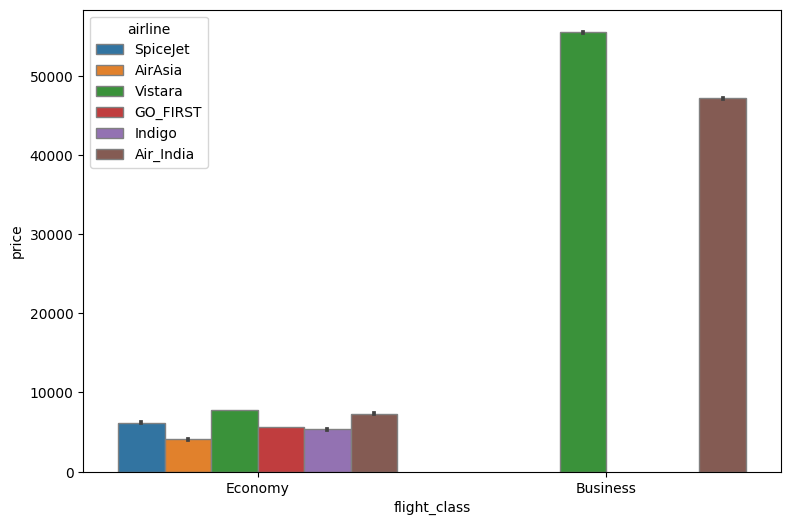

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'flight_class',y='price',data = df,hue = 'airline',edgecolor=".5")

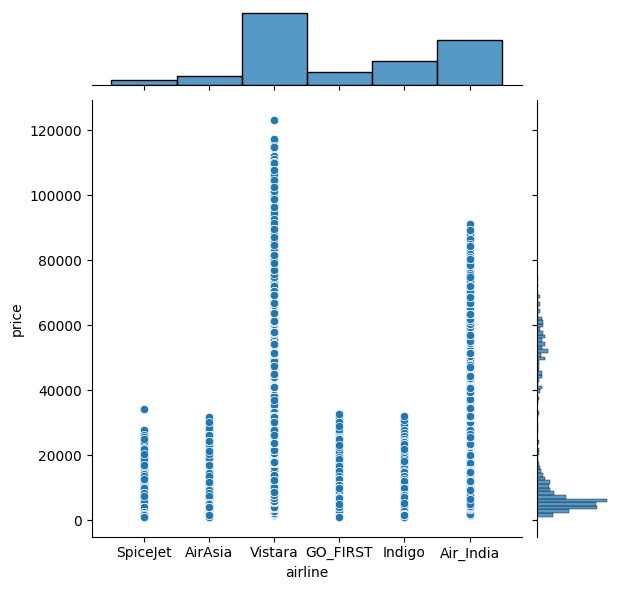

In [ ]:
sns.jointplot(x='airline',y='price',data=df)

<Axes: xlabel='airline', ylabel='price'>

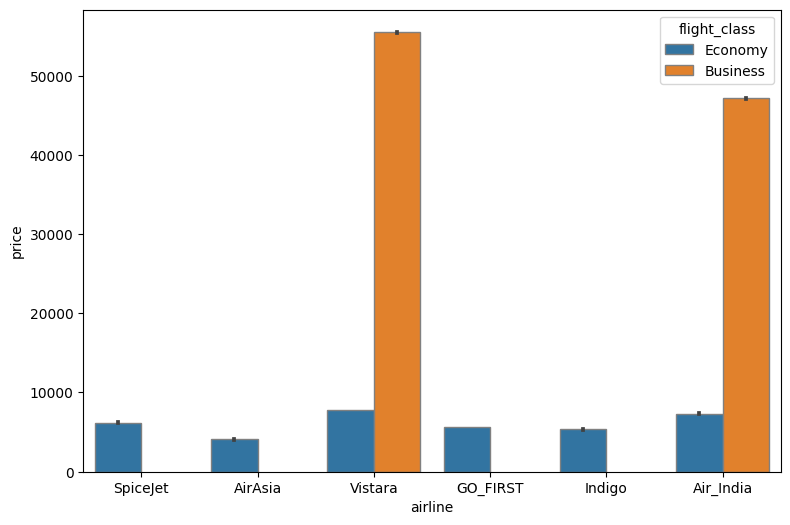

In [ ]:
plt.figure(figsize=(9,6))
sns.barplot(x = 'airline',y='price',data = df,hue = 'flight_class',edgecolor=".5")

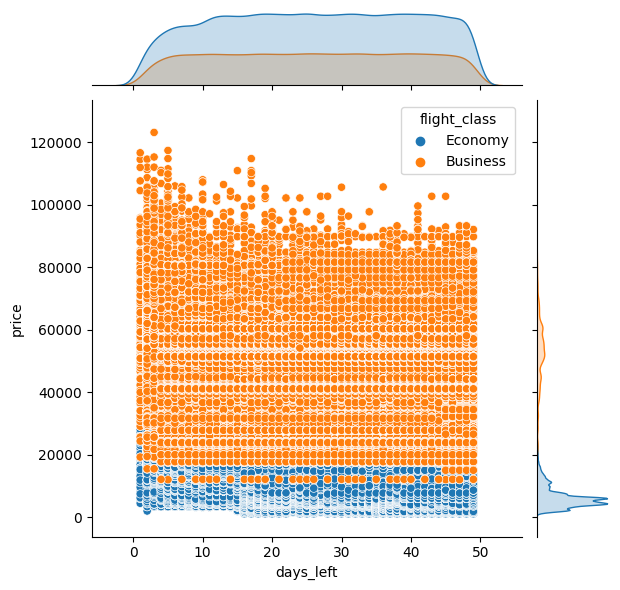

In [ ]:
sns.jointplot(x='days_left',y='price',data=df,hue='flight_class')

<Axes: xlabel='days_left', ylabel='price'>

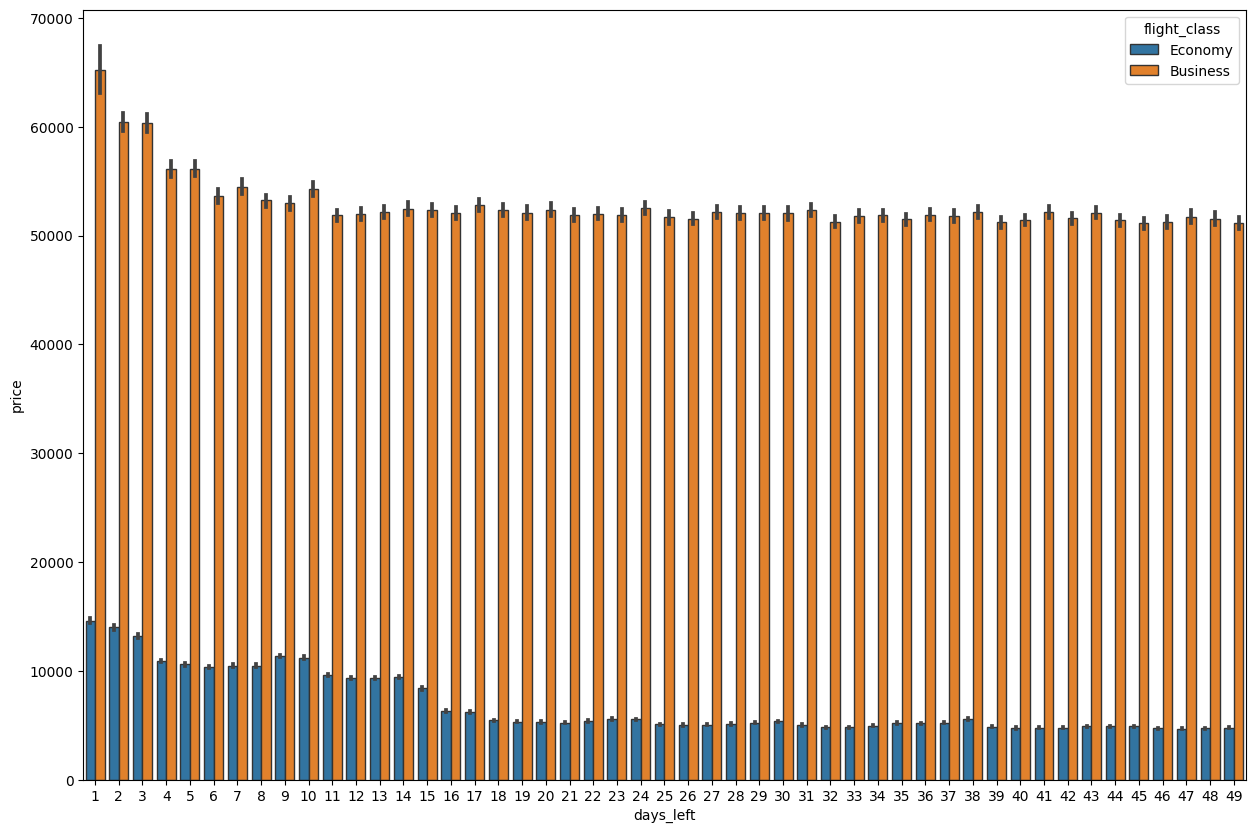

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'days_left',y='price',data = df,hue = 'flight_class',edgecolor=".2")

<Axes: xlabel='airline', ylabel='count'>

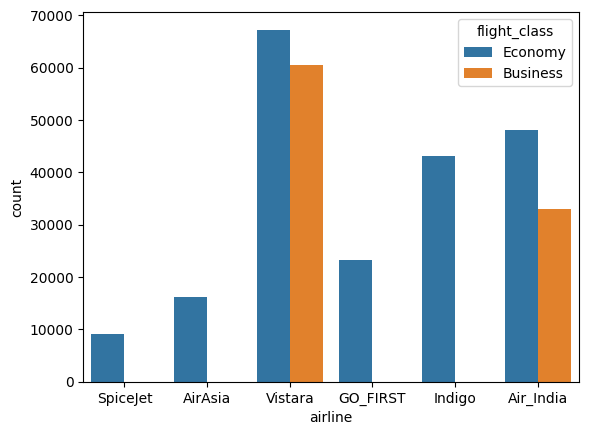

In [ ]:
sns.countplot(x='airline',data=df,hue='flight_class')

# **Data Cleaning and Preprocessing**

In [ ]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [ ]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [ ]:
df['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

In [ ]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [ ]:
df['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

In [ ]:
df['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [ ]:
df['flight_class'].value_counts()

Economy     206666
Business     93487
Name: flight_class, dtype: int64

In [ ]:
df['airline']=df['airline'].map({'Vistara':1,'Air_India':2,'Indigo':3,'GO_FIRST':4,'AirAsia':5,'SpiceJet':6})
df['source_city']=df['source_city'].map({'Delhi':1,'Mumbai':2,'Bangalore':3,'Kolkata':4,'Hyderabad':5,'Chennai':6})
df['departure_time']=df['departure_time'].map({'Early_Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5,'Late_Night':6})
df['stops']=df['stops'].map({'zero':0,'one':1,'two_or_more':2})
df['arrival_time']=df['arrival_time'].map({'Early_Morning':1,'Morning':2,'Afternoon':3,'Evening':4,'Night':5,'Late_Night':6})
df['destination_city']=df['destination_city'].map({'Delhi':1,'Mumbai':2,'Bangalore':3,'Kolkata':4,'Hyderabad':5,'Chennai':6})
df['flight_class']=df['flight_class'].map({'Economy':1,'Business':2})
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
0,6,1,4,0,5,2,1,1,5953
1,6,1,1,0,2,2,1,1,5953
2,5,1,1,0,1,2,1,1,5956
3,1,1,2,0,3,2,1,1,5955
4,1,1,2,0,2,2,1,1,5955
...,...,...,...,...,...,...,...,...,...
300148,1,6,2,1,4,5,2,49,69265
300149,1,6,3,1,5,5,2,49,77105
300150,1,6,1,1,5,5,2,49,79099
300151,1,6,1,1,4,5,2,49,81585


# **Correlation**

In [ ]:
df.corr()

,airline,source_city,departure_time,stops,arrival_time,destination_city,flight_class,days_left,price
airline,1.000000,-0.061739,-0.008695,-0.119208,0.031609,-0.078039,-0.399635,0.019514,-0.428303
source_city,-0.061739,1.000000,-0.002556,0.057762,0.045801,-0.201978,0.006292,0.008704,0.026990
departure_time,-0.008695,-0.002556,1.000000,-0.068986,-0.079679,0.020780,0.030956,-0.000222,0.020948
stops,-0.119208,0.057762,-0.068986,1.000000,0.046436,0.122878,0.001027,-0.008540,0.119648
arrival_time,0.031609,0.045801,-0.079679,0.046436,1.000000,-0.101751,-0.022473,-0.000700,-0.001019
destination_city,-0.078039,-0.201978,0.020780,0.122878,-0.101751,1.000000,0.015187,-0.002465,0.034476
flight_class,-0.399635,0.006292,0.030956,0.001027,-0.022473,0.015187,1.000000,-0.013039,0.937860
days_left,0.019514,0.008704,-0.000222,-0.008540,-0.000700,-0.002465,-0.013039,1.000000,-0.091949
price,-0.428303,0.026990,0.020948,0.119648,-0.001019,0.034476,0.937860,-0.091949,1.000000


<Axes: >

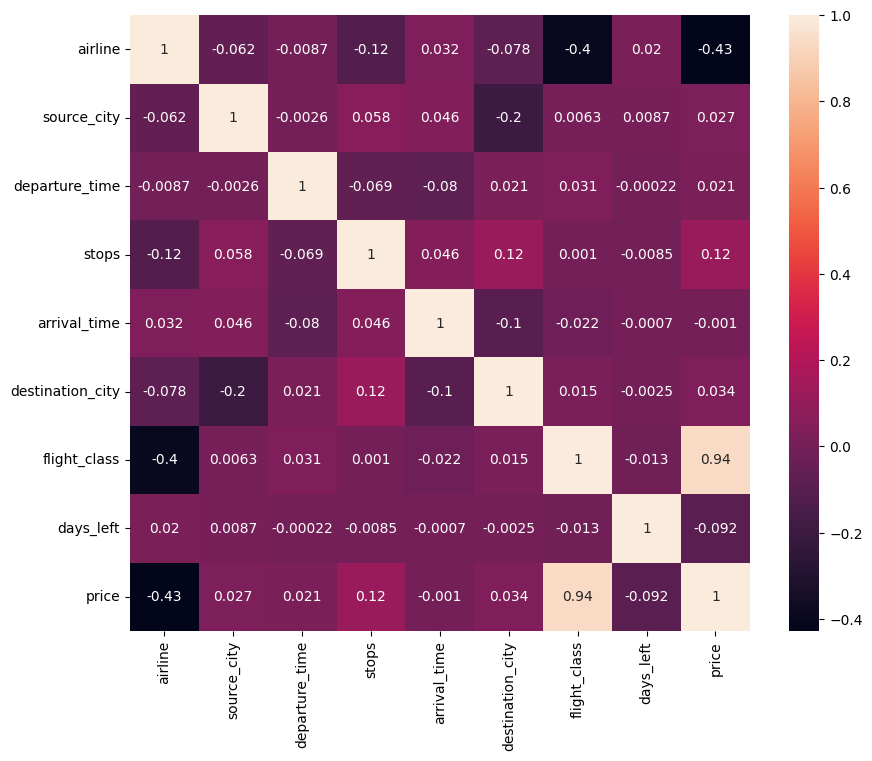

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(['departure_time'],axis=1,inplace=True)
df.drop(['arrival_time'],axis=1,inplace=True)

## Splitting Of Dataset

In [ ]:
X=df.iloc[:,:-1]
X

,airline,source_city,stops,destination_city,flight_class,days_left
0,6,1,0,2,1,1
1,6,1,0,2,1,1
2,5,1,0,2,1,1
3,1,1,0,2,1,1
4,1,1,0,2,1,1
...,...,...,...,...,...,...
300148,1,6,1,5,2,49
300149,1,6,1,5,2,49
300150,1,6,1,5,2,49
300151,1,6,1,5,2,49


In [ ]:
y=df.iloc[:,-1]
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.3)


# **LinearRegression**

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred_lr=lr.predict(X_test)
y_pred_lr

array([ 4491.38411451,  8525.76377324,  5413.33914332, ...,
        8895.2922633 ,  4496.38216771, 56097.62487271])

In [ ]:
y_test.values

array([ 6048, 13421,  2836, ...,  8112,  3090, 85148])

In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test,y_pred_lr))
print('Mean squared error:',mean_squared_error(y_test,y_pred_lr))
print('Mean absolute percentage error error:', mean_absolute_percentage_error(y_test,y_pred_lr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2_score:', r2_score(y_test,y_pred_lr))

Mean absolute error: 4515.37203730055
Mean squared error: 49932714.181702495
Mean absolute percentage error error: 0.4065531084592743
Root mean squared error: 7066.308384276934
R2_score: 0.9027798507498729


In [ ]:
y_new_lr=lr.predict([[6,1,0,2,1,1]])
y_new_lr

array([856.12312669])

# **Random Forest Regressor**

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred_rfr = rfr.predict(X_test)
y_pred_rfr

array([ 5970.95589639,  7382.73121723,  3551.2185    , ...,
        7445.6736714 ,  4101.05842993, 76015.79262926])

In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test,y_pred_rfr))
print('Mean squared error:',mean_squared_error(y_test,y_pred_rfr))
print('Mean absolute percentage error error:', mean_absolute_percentage_error(y_test,y_pred_rfr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred_rfr)))
print('R2_score:', r2_score(y_test,y_pred_rfr))

Mean absolute error: 2448.1576598338165
Mean squared error: 20737261.084430594
Mean absolute percentage error error: 0.1446175860515205
Root mean squared error: 4553.818297256775
R2_score: 0.9596240731010378


In [ ]:
y_new_rfr=rfr.predict([[6,1,0,2,1,1]])
y_new_rfr

array([7955.58])

# **KNeighbors Regressor**

In [ ]:
knn=KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pred_knr=knn.predict(X_test)
y_pred_knr

array([ 5926.18181818,  6700.        ,  3535.63636364, ...,
        7402.27272727,  4341.90909091, 74645.27272727])

In [ ]:
print('Mean absolute error:', mean_absolute_error(y_test,y_pred_knr))
print('Mean squared error:',mean_squared_error(y_test,y_pred_knr))
print('Mean absolute percentage error error:', mean_absolute_percentage_error(y_test,y_pred_knr))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred_knr)))
print('R2_score:', r2_score(y_test,y_pred_knr))

Mean absolute error: 2943.776131593347
Mean squared error: 28080571.36290111
Mean absolute percentage error error: 0.1981421948729531
Root mean squared error: 5299.110431280057
R2_score: 0.9453264781682851


In [ ]:
y_new_knr=knn.predict([[6,1,0,2,1,1]])
y_new_knr

array([10182.09090909])

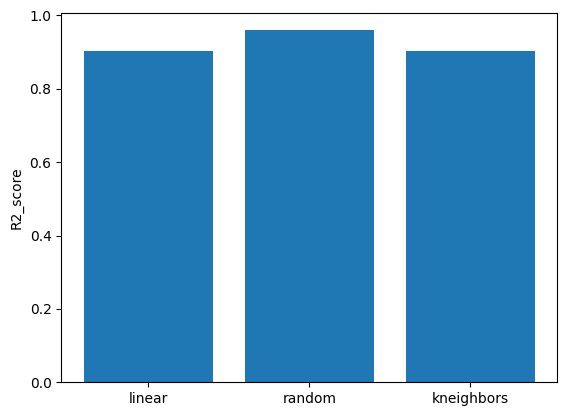

In [ ]:
X1=['linear','random','kneighbors']
Y1=[r2_score(y_test,y_pred_lr),
r2_score(y_test,y_pred_rfr),
r2_score(y_test,y_pred_lr)]
plt.bar(X1,Y1)
plt.ylabel('R2_score')
plt.show()


# **SVR**

In [ ]:
#sv=SVR()
#sv.fit(X_train,y_train)

In [ ]:
#y_pred_sv=sv.predict(X_test)
#y_pred_sv

In [ ]:
#print('Mean absolute error:', mean_absolute_error(y_test,y_pred_sv))
#print('Mean squared error:',mean_squared_error(y_test,y_pred_sv))
#print('Mean absolute percentage error error:', mean_absolute_percentage_error(y_test,y_pred_sv))
#print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,y_pred_sv)))
#print('R2_score:', r2_score(y_test,y_pred_sv))

In [ ]:
#y_new_sv=sv.predict([[6,1,0,2,1,1]])
#y_new_sv

In [ ]:
import pickle

In [ ]:
pickle.dump(rfr,open('model.pkl','wb'))

In [ ]:
loaded_model=pickle.load(open('model.pkl','rb'))

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 89.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.73.130.103


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



npx: installed 22 in 7.933s
your url is: https://few-ducks-change.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.130.103:8501



In [ ]:
# streamlit code
import streamlit as st
import pickle
import sklearn
import pandas as pd
import numpy as np
loaded_model=pickle.load(open('model.pkl','rb'))
st.title("""FLIGHT TICKET PRICE PREDICTION""")
st.subheader('Airlines')
st.write('1-vistara, 2-air india, 3-indigo, 4-go first, 5-air asia, 6-spicejet')
st.subheader('Cities')
st.write('1-Delhi, 2-Mumbai, 3-Bangalore, 4-Kolkata, 5-Hyderabad, 6-Chennai')
st.subheader('Flight Class')
st.write('1 - Economy class, 2 - Business class ')
st.sidebar.header('Choose Your Preference')
def user_report():
  airline=st.sidebar.slider("Airlines",1,6)
  source_city=st.sidebar.slider('Source_City',1,6)
  stops=st.sidebar.slider('Stops',0,2)
  destination_city=st.sidebar.slider('Destination',1,6)
  flight_class=st.sidebar.slider('Flight Class',1,2)
  days_left=st.sidebar.slider('Daysleft',1,49)
  user_report_data={
    'airline':airline,
    'source_city':source_city,
    'stops':stops,
    'destination_city':destination_city,
    'flight_class':flight_class,
    'days_left':days_left
  }
  report_data=pd.DataFrame(user_report_data,index=[0])
  return report_data
user_data=user_report()
st.header('Travel Details')
st.write(user_data)
price=loaded_model.predict(user_data)
st.subheader('Flight Ticket Price')
st.subheader('Rs  .'+str(np.round(price[0],0)))